### CCCA on Gene expression and cell types proportion

In [64]:
import pandas as pd
import numpy as np

df = pd.read_csv('/u/home/a/asarkar/project-jflint/Sepsis_prediction/express.tsv', sep='\t', dtype=object)
df1 = pd.read_csv('/u/home/a/asarkar/project-jflint/Sepsis_prediction/sepsis_data.csv', dtype=object)

# Cell type prop data
df1 = df1.drop(['Unnamed: 0'],axis=1)
df1['Death'] = df1['Death'].apply(pd.to_numeric)

# GE data
df = df.T
df.columns = list(df.iloc[[0]].to_numpy())
df = df.drop(['Symbol'],axis=0)
df['Colnames'] = df.index

# Getting them equal
class1 = df1[df1['Death']==1]
class2 = df1[df1['Death']==0]
class2 = class2.reindex(np.random.permutation(class2.index))[0:157]

lst1 = df['Colnames'].squeeze()
lst2 = class1['Sample_ID']
lst3 = class2["Sample_ID"]
    
l1 = list(set(lst1) & set(lst2))
l2 = list(set(lst1) & set(lst3))

print(len(l1),len(l2))

# Squeezing columns
class1_g = df[df['Colnames'].squeeze().isin(l1)]
class2_g = df[df['Colnames'].squeeze().isin(l2)]

# Reordering the columns of Gene expression
class1_g = class1_g.sort_index()
class2_g = class2_g.sort_index()
class1_g = class1_g.drop(['Colnames'],axis=1)
class2_g = class2_g.drop(['Colnames'],axis=1)

# Reordering the columns of cell type proportions
class1 = class1.sort_values(by=['Sample_ID'])
class2 = class2.sort_values(by=['Sample_ID'])
class1.index = class1['Sample_ID']
class2.index = class2['Sample_ID']
class1 = class1.drop(['Sample_ID','Age','Death','Gender'],axis=1)
class2 = class2.drop(['Sample_ID','Age','Death','Gender'],axis=1)

class1_g = class1_g.sample(10,random_state=42,axis='columns')
class2_g = class2_g.sample(10,random_state=42,axis='columns')

# Forming X1, X2, Y1 and Y2
X1 = class1_g.to_numpy()
Y1 = class1.to_numpy()
X2 = class2_g.to_numpy()
Y2 = class2.to_numpy()
print(X1.shape,Y2.shape)

157 157
(157, 10) (157, 10)


In [76]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

lambd = 0.6

# changing to float 64 bits
Y2 = Y2.astype('float64')
X2 = X2.astype('float64')
X1 = X1.astype('float64')
Y1 = Y1.astype('float64')

T2 = X2.T@Y2
T1 = X1.T@Y1

def objective(x):
    u = x[0:10].reshape((10,1))
    v = x[10:20].reshape((10,1))
    Sol = u.T@T2@v - lambd*u.T@T1@v
    return(Sol.flatten())

def constraint1(x):
    t = 1.0
    s = np.linalg.norm(x[0:10])
    return(np.linalg.norm(s-t))

def constraint2(x):
    t = 1.0
    s = np.linalg.norm(x[10:20])
    return(np.linalg.norm(s-t))

con1 = {'type': 'eq','fun': constraint1}
con2 = {'type': 'eq','fun': constraint2}

cons = [con1, con2]
x0 = np.zeros((20, 1))

a = minimize(objective, x0, method='SLSQP', constraints=cons)

u = np.abs(a.x[0:10])
v = np.abs(a.x[10:20])

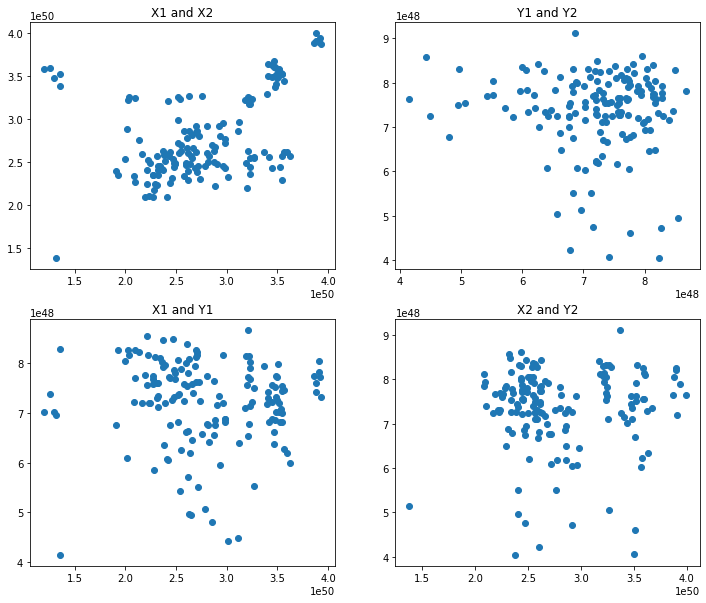

In [82]:
X1_dummy = X1@u
X2_dummy = X2@u
Y1_dummy = Y1@v
Y2_dummy = Y2@v

fig,axs = plt.subplots(2,2,figsize=(12,10))
axs[0,0].scatter(X1_dummy,X2_dummy)
axs[0,0].set_title('X1 and X2')

axs[0,1].scatter(Y1_dummy,Y2_dummy)
axs[0,1].set_title('Y1 and Y2')

axs[1,0].scatter(X1_dummy,Y1_dummy)
axs[1,0].set_title('X1 and Y1')

axs[1,1].scatter(X2_dummy,Y2_dummy)
axs[1,1].set_title('X2 and Y2')

plt.show()

### CCCA on Penguins dataset

In [14]:
import pandas as pd
import numpy as np

link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(link2data)
df =df.dropna()
X1 = df[df['sex'] == 'MALE'][['bill_length_mm','bill_depth_mm']].to_numpy()
X2 = df[df['sex'] == 'FEMALE'][['bill_length_mm','bill_depth_mm']].to_numpy()
Y1 = df[df['sex'] == 'MALE'][['flipper_length_mm','body_mass_g']].to_numpy()
Y2 = df[df['sex'] == 'FEMALE'][['flipper_length_mm','body_mass_g']].to_numpy()

t1 = df[df['sex'] == 'MALE'][['island']].to_numpy()
t2 = df[df['sex'] == 'FEMALE'][['island']].to_numpy()

print(X1.shape,Y1.shape,X2.shape,Y2.shape)

(168, 2) (168, 2) (165, 2) (165, 2)


In [15]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

lambd = 0.6

# changing to float 64 bits
Y2 = Y2.astype('float64')
X2 = X2.astype('float64')
X1 = X1.astype('float64')
Y1 = Y1.astype('float64')

T2 = X2.T@Y2
T1 = X1.T@Y1

def objective(x):
    u = x[0:2].reshape((2,1))
    v = x[2:4].reshape((2,1))
    Sol = u.T@T2@v - lambd*u.T@T1@v
    return(Sol.flatten())

def constraint1(x):
    t = 1.0
    s = np.linalg.norm(x[0:2])
    return(np.linalg.norm(s-t))

def constraint2(x):
    t = 1.0
    s = np.linalg.norm(x[2:4])
    return(np.linalg.norm(s-t))

con1 = {'type': 'eq','fun': constraint1}
con2 = {'type': 'eq','fun': constraint2}

cons = [con1, con2]
x0 = np.zeros((4, 1))

a = minimize(objective, x0, method='SLSQP', constraints=cons)

u = np.abs(a.x[0:2])
v = np.abs(a.x[2:4])

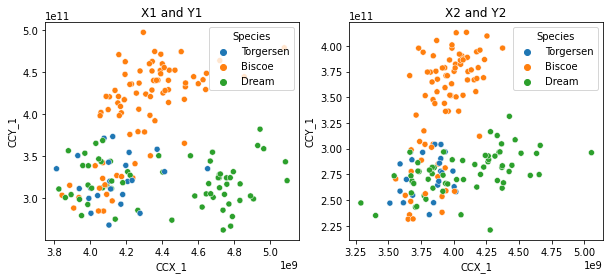

In [16]:
import seaborn as sns

X1_dummy = X1@u
X2_dummy = X2@u
Y1_dummy = Y1@v
Y2_dummy = Y2@v

cc_res_m = pd.DataFrame({"CCX_1":X1_dummy.tolist(),
                       "CCY_1":Y1_dummy.tolist(),
                       "Species":t1.reshape(1,-1).tolist()[0]})

cc_res_f = pd.DataFrame({"CCX_1":X2_dummy.tolist(),
                       "CCY_1":Y2_dummy.tolist(),
                       "Species":t2.reshape(1,-1).tolist()[0]})

fig,axs = plt.subplots(1,2,figsize=(10,4))

sns.scatterplot(ax=axs[0],x="CCX_1",
                y="CCY_1", 
                hue="Species", data=cc_res_m)
axs[0].set_title('X1 and Y1')

sns.scatterplot(ax=axs[1],x="CCX_1",
                y="CCY_1", 
                hue="Species", data=cc_res_f)
axs[1].set_title('X2 and Y2')

plt.show()

### CCA on penguins data

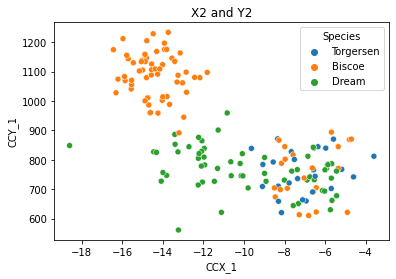

In [18]:
from sklearn.cross_decomposition import CCA

ca = CCA()
# T2 = X2.T@Y2

ca.fit(X1,Y1)

u = ca.x_weights_[0]
v = ca.y_weights_[0]

X2_dummy = X2@u
Y2_dummy = Y2@v

cc_res_f = pd.DataFrame({"CCX_1":X2_dummy.tolist(),
                       "CCY_1":Y2_dummy.tolist(),
                       "Species":t2.reshape(1,-1).tolist()[0]})

# fig,axs = plt.subplots(1,1,figsize=(10,4))

sns.scatterplot(x="CCX_1",y="CCY_1", 
                hue="Species", data=cc_res_f)
plt.title('X2 and Y2')

plt.show()

In [10]:
X2_dummy.shape

(165, 2)

### CCCA on insurance data

In [133]:
df = pd.read_csv('/u/home/a/asarkar/project-jflint/ContrastCCA/insurance.csv')
df =df.dropna()
df.head(10)
X1 = df[df['sex'] == 'male'][['age','bmi']].to_numpy()
X2 = df[df['sex'] == 'female'][['age','bmi']].to_numpy()
Y1 = df[df['sex'] == 'male'][['children','charges']].to_numpy()
Y2 = df[df['sex'] == 'female'][['children','charges']].to_numpy()

t1 = df[df['sex'] == 'male'][['smoker']].to_numpy()
t2 = df[df['sex'] == 'female'][['smoker']].to_numpy()

print(X1.shape,Y1.shape,X2.shape,Y2.shape)

(676, 2) (676, 2) (662, 2) (662, 2)


In [134]:
lambd = 0.6

# changing to float 64 bits
Y2 = Y2.astype('float64')
X2 = X2.astype('float64')
X1 = X1.astype('float64')
Y1 = Y1.astype('float64')

T2 = X2.T@Y2
T1 = X1.T@Y1

def objective(x):
    u = x[0:2].reshape((2,1))
    v = x[2:4].reshape((2,1))
    Sol = u.T@T2@v - lambd*u.T@T1@v
    return(Sol.flatten())

def constraint1(x):
    t = 1.0
    s = np.linalg.norm(x[0:2])
    return(np.linalg.norm(s-t))

def constraint2(x):
    t = 1.0
    s = np.linalg.norm(x[2:4])
    return(np.linalg.norm(s-t))

con1 = {'type': 'eq','fun': constraint1}
con2 = {'type': 'eq','fun': constraint2}

cons = [con1, con2]
x0 = np.zeros((4, 1))

a = minimize(objective, x0, method='SLSQP', constraints=cons)

u = np.abs(a.x[0:2])
v = np.abs(a.x[2:4])

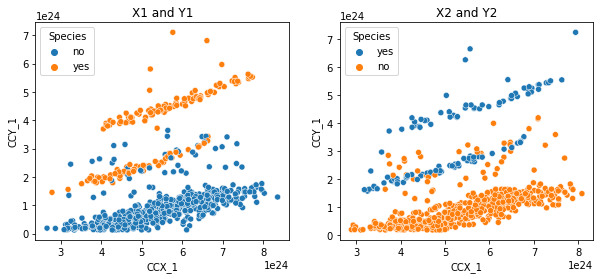

In [135]:
import seaborn as sns

X1_dummy = X1@u
X2_dummy = X2@u
Y1_dummy = Y1@v
Y2_dummy = Y2@v

cc_res_m = pd.DataFrame({"CCX_1":X1_dummy.tolist(),
                       "CCY_1":Y1_dummy.tolist(),
                       "Species":t1.reshape(1,-1).tolist()[0]})

cc_res_f = pd.DataFrame({"CCX_1":X2_dummy.tolist(),
                       "CCY_1":Y2_dummy.tolist(),
                       "Species":t2.reshape(1,-1).tolist()[0]})

fig,axs = plt.subplots(1,2,figsize=(10,4))

sns.scatterplot(ax=axs[0],x="CCX_1",
                y="CCY_1", 
                hue="Species", data=cc_res_m)
axs[0].set_title('X1 and Y1')

sns.scatterplot(ax=axs[1],x="CCX_1",
                y="CCY_1", 
                hue="Species", data=cc_res_f)
axs[1].set_title('X2 and Y2')

plt.show()